# Weekly assignments week 1-3

Weekly assignment 1: exploratory data analysis

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

In [17]:
steps.head()

,id,20/06/2013,21/06/2013,22/06/2013,23/06/2013,24/06/2013,25/06/2013,26/06/2013,27/06/2013,28/06/2013,...,04/05/2014,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [19]:
df = survey.merge(steps, on="id")

In [20]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20/06/2013,...,04/05/2014,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df['mean_steps_per_participant'] = df.loc[:,'20/06/2013':'13/05/2014'].mean(axis=1) 

Axis=1 means that the function is applied row-wise on the DataFrame

In [22]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20/06/2013,...,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014,mean_steps_per_participant
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [23]:
df.describe()

,id,hh_size,education,height,weight,20/06/2013,21/06/2013,22/06/2013,23/06/2013,24/06/2013,...,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014,mean_steps_per_participant
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,925.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,7036.627485
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,7396.879008
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,4.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4636.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6245.006061
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8399.670213
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,201722.600000


In [24]:
df = df[(df['weight'] < 200) & (df['weight'] > 35)]
df.describe()

,id,hh_size,education,height,weight,20/06/2013,21/06/2013,22/06/2013,23/06/2013,24/06/2013,...,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014,mean_steps_per_participant
count,924.000000,924.000000,924.000000,923.000000,924.000000,24.000000,240.000000,275.000000,294.000000,351.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,920.000000
mean,464.225108,2.339827,2.525974,171.725894,72.284632,3642.416667,9018.937500,10880.509091,7409.537415,8082.786325,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,7021.510401
std,267.681497,1.226864,1.273267,9.055364,15.453637,3951.910368,6444.654214,6290.354387,6744.108645,5475.644970,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,7406.689567
min,1.000000,1.000000,1.000000,145.000000,37.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,4.000000
25%,232.750000,1.000000,1.000000,165.000000,61.000000,299.500000,4364.000000,6537.500000,2761.500000,4428.000000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4633.941050
50%,464.500000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6244.931602
75%,695.250000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14237.500000,10447.250000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8366.832967
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,201722.600000


In [25]:
df = df[(df['mean_steps_per_participant'] < 100000)]
df.describe()

,id,hh_size,education,height,weight,20/06/2013,21/06/2013,22/06/2013,23/06/2013,24/06/2013,...,05/05/2014,06/05/2014,07/05/2014,08/05/2014,09/05/2014,10/05/2014,11/05/2014,12/05/2014,13/05/2014,mean_steps_per_participant
count,919.000000,919.000000,919.000000,918.000000,919.000000,23.000000,240.000000,275.000000,294.000000,351.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,919.000000
mean,464.371055,2.335147,2.522307,171.748366,72.279652,3537.304348,9018.937500,10880.509091,7409.537415,8082.786325,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,6809.648498
std,267.762268,1.223755,1.272849,9.066871,15.462624,4006.278430,6444.654214,6290.354387,6744.108645,5475.644970,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,3684.996257
min,1.000000,1.000000,1.000000,145.000000,37.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,4.000000
25%,232.500000,1.000000,1.000000,165.000000,61.000000,299.000000,4364.000000,6537.500000,2761.500000,4428.000000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4633.509550
50%,464.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6244.857143
75%,695.500000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14237.500000,10447.250000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8345.605771
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,58491.067568


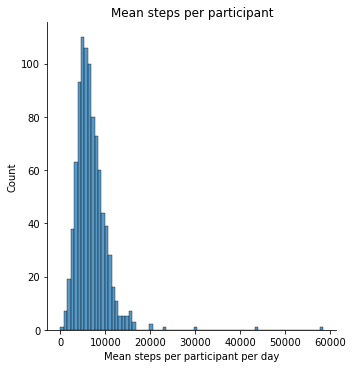

In [26]:
df['mean_steps_per_participant'].name = 'Mean steps per participant per day' 
mean_steps_per_participant = df['mean_steps_per_participant'].dropna()
sns.displot(mean_steps_per_participant, kde=False) 
plt.title('Mean steps per participant')
plt.show()

The median steps per particpant is: 6244.857142857143
The mean steps per participant is: 6809.648497585308


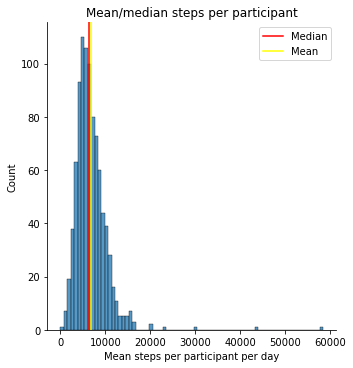

In [27]:
mean = df['mean_steps_per_participant'].mean()
median = df['mean_steps_per_participant'].median()

print(f'The median steps per particpant is: {median}')
print(f'The mean steps per participant is: {mean}')

sns.displot(mean_steps_per_participant, kde=False)
plt.title('Mean/median steps per participant')
plt.axvline(median, 0, 100, color='red', label='Median')  
plt.axvline(mean, 0, 100, color='yellow', label='Mean') 
plt.legend() 
plt.show()

Normality: You can see the normal distribution curve with the mean vaule in the middle. 

Skewness: In This particular case, the graph is positively skewed or symmetrical distributed. Because of a couple of outliers, it looks more like a positive skew. But without outliers, it looks more like a symmetrical distribution. 

Outliers: There are a couple of outliers. In this case it means that a couple of people were walking many steps more than most people.

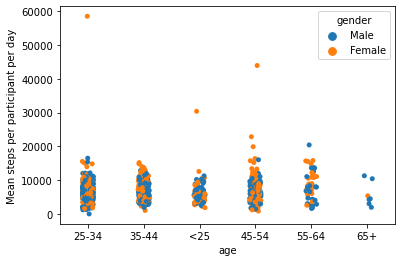

In [28]:
ax = sns.stripplot(x='age', y='mean_steps_per_participant', hue='gender', data=df)

Interpret results: This graph shows that three female participants in three different age groups walk much more steps per day on average than other participants. Question is whether walking almost 60000 steps a day is true. 

Weekly assignment 2: correlation

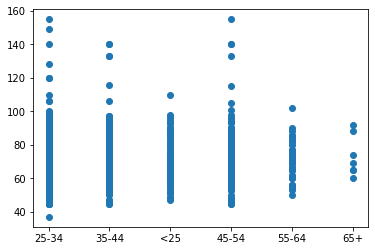

In [29]:
plt.scatter(x=df['age'], y=df['weight'])

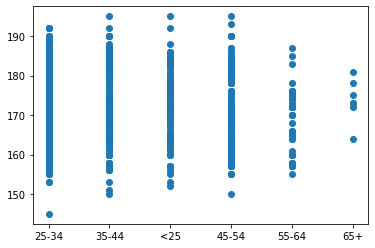

In [30]:
plt.scatter(x=df['age'], y=df['height'])

In [31]:
corr = df[['weight', 'height', 'mean_steps_per_participant']].corr()
corr

,weight,height,mean_steps_per_participant
weight,1.000000,0.511067,-0.068658
height,0.511067,1.000000,-0.090355
mean_steps_per_participant,-0.068658,-0.090355,1.000000


Interpret results: There is a moderate positive relationship between weight and height r=0.511. There is a minimal relationship found between weight and height in combination with mean_steps_per_participant.

Weekly assignment 3: linear regression

Explain linear regression: Linear regression is used to evaluate a potential relationship between variables.

In [32]:
gender_dummy = pd.get_dummies(df["gender"])
df = pd.concat([df, gender_dummy], axis=1)

In [33]:
education_dummy = pd.get_dummies(df["education_1"])
df = pd.concat([df, education_dummy], axis=1)

In [34]:
x = df[['mean_steps_per_participant']]
y = df['weight']
lm = LinearRegression()
lm.fit(x, y)
df['weight_p'] = lm.predict(x)
df['resid'] = df['weight'] - df['weight_p']

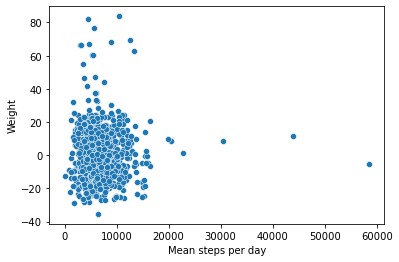

In [35]:
sns.scatterplot(x='mean_steps_per_participant',y='resid',data=df)
plt.xlabel('Mean steps per day')
plt.ylabel('Weight')
plt.show()

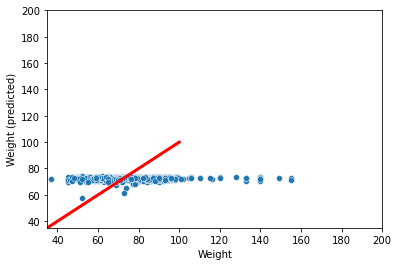

In [36]:
sns.scatterplot(x='weight',y='weight_p',data=df)
plt.xlim(35, 200) 
plt.ylim(35, 200) 
plt.plot([0, 100], [0, 100], color='red', lw=3) 
plt.xlabel('Weight')
plt.ylabel('Weight (predicted)')
plt.show()

In [37]:
r2_score(df['weight'], df['weight_p'])

0.004713881408395015

Evaluate:The r2 is 0.0047, which means that 0,4% of the variation in average steps per day is explained by the model.

In [38]:
math.sqrt(mean_squared_error(df['weight'], df['weight_p']))

15.417741048959499

Evaluate: The RMSE is 15.41. Which means that I am about 15.41 off in my predicting rating. 